# 0: Getting stocks

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
tickers = pd.read_excel('Hang Seng (HSI).xlsx', usecols=["Ticker"])

data = pd.DataFrame(columns=tickers["Ticker"])
for ticker in data.columns:
    data[ticker] = yf.download(ticker,'2016-01-01','2016-12-31')['Adj Close']

data.dropna(axis='columns',how='all', inplace=True)
data.to_excel('outputHKstocks.xlsx', index=False)

In [461]:
data = pd.read_excel('outputHKstocks.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change()) # подсчёт логарифмической доходности
data.to_excel('outputHKstocksReturns.xlsx', index=False)

In [463]:
data = pd.read_excel('outputHKstocksReturns.xlsx')
eff = np.array([data.iloc[:, i].mean() for i in range(len(data.columns))]) # подсчёт эффективности
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))]) # подсчёт риска
print(eff, risk)

data_er = pd.DataFrame({'company': data.columns, 'company': data.columns, 'effiency': eff,'risk': risk}) # сбор данных в один датафрейм
data_er.to_excel('outputHKstocksEffRisk.xlsx', index=False)

[ 5.39652103e-04  1.45988909e-04  4.32140994e-04  7.99557172e-05
  2.24459981e-04 -4.46834808e-05  3.60377418e-04  4.94219095e-04
  1.37202147e-03  1.19875672e-04 -1.56943528e-05  2.55216886e-03
  1.86811613e-03  1.68992052e-03  1.79110053e-04  9.10263467e-04
 -1.00614263e-04 -3.84842251e-04  9.92176028e-04  4.42491367e-06
  5.76389915e-04 -3.06843648e-04  6.15540910e-04  1.76176057e-03
  1.96079337e-03  9.33518213e-04  8.20655945e-04 -2.31233353e-05
 -3.82735096e-04  1.86412595e-03  1.08017894e-03  3.27588230e-04
  2.83665655e-04 -2.27412721e-05 -5.77719916e-06 -9.01360066e-05
  1.94891913e-03  3.77147136e-04  1.39124730e-03  9.91300694e-04
  5.33417294e-04  5.86257615e-04 -1.37690606e-04  7.88397011e-04
  6.69985256e-04  2.68926971e-03  9.50884339e-04  1.07008392e-03
  3.47058196e-04  3.66559502e-04] [0.00961425 0.01051561 0.01565867 0.01150915 0.01113994 0.01649503
 0.01566779 0.01529998 0.02469973 0.01119488 0.01609086 0.02760791
 0.03119006 0.01748131 0.02291354 0.02004985 0.01407

In [465]:
data = pd.read_excel('outputHKstocksEffRisk.xlsx')
sector = []
name = []
for ticker in data["company"]:
    try:
        sector.append(yf.Ticker(ticker).info['industry'])
        name.append(yf.Ticker(ticker).info['longName'])
    except KeyError:
        sector.append("No Name")
        name.append("No Name")
data = pd.DataFrame({'ticker': data["company"], 'company': name, 'sector': sector, 'effiency': data["effiency"], 'risk': data["risk"]})
data.to_excel('outputHKstocksEffRisk.xlsx', index=False)

### Итоговая таблица 50 активов, отобранных с помощью HANG SENG PROPERTIES INDEX:

| ticker  | company                                               | sector                                  | effiency     | risk        |
|---------|-------------------------------------------------------|-----------------------------------------|--------------|-------------|
| 0002.HK | CLP Holdings Limited                                  | Utilities - Regulated Electric          | 0.000539652  | 0.009614254 |
| 0003.HK | The Hong Kong and China Gas Company Limited           | Utilities - Regulated Gas               | 0.000145989  | 0.010515613 |
| 0005.HK | HSBC Holdings plc                                     | Banks - Diversified                     | 0.000432141  | 0.01565867  |
| 0006.HK | Power Assets Holdings Limited                         | Utilities - Independent Power Producers | 7.99557E-05  | 0.011509149 |
| 0011.HK | Hang Seng Bank Limited                                | Banks - Regional                        | 0.00022446   | 0.011139942 |
| 0012.HK | Henderson Land Development Company Limited            | Real Estate - Diversified               | -4.46835E-05 | 0.01649503  |
| 0016.HK | Sun Hung Kai Properties Limited                       | Real Estate - Development               | 0.000360377  | 0.015667793 |
| 0017.HK | New World Development Company Limited                 | Real Estate - Diversified               | 0.000494219  | 0.01529998  |
| 0027.HK | Galaxy Entertainment Group Limited                    | Resorts & Casinos                       | 0.001372021  | 0.02469973  |
| 0066.HK | MTR Corporation Limited                               | Railroads                               | 0.000119876  | 0.011194883 |
| 0101.HK | Hang Lung Properties Limited                          | Real Estate Services                    | -1.56944E-05 | 0.016090861 |
| 0175.HK | Geely Automobile Holdings Limited                     | Auto Manufacturers                      | 0.002552169  | 0.02760791  |
| 0285.HK | BYD Electronic (International) Company Limited        | Electronic Components                   | 0.001868116  | 0.031190063 |
| 0288.HK | WH Group Limited                                      | Packaged Foods                          | 0.001689921  | 0.017481309 |
| 0291.HK | China Resources Beer (Holdings) Company Limited       | Beverages - Brewers                     | 0.00017911   | 0.022913544 |
| 0386.HK | China Petroleum & Chemical Corporation                | Oil & Gas Integrated                    | 0.000910263  | 0.020049848 |
| 0388.HK | Hong Kong Exchanges and Clearing Limited              | Financial Data & Stock Exchanges        | -0.000100614 | 0.014077074 |
| 0669.HK | Techtronic Industries Company Limited                 | Tools & Accessories                     | -0.000384842 | 0.017148337 |
| 0700.HK | Tencent Holdings Limited                              | Internet Content & Information          | 0.000992176  | 0.015718325 |
| 0762.HK | China Unicom (Hong Kong) Limited                      | Telecom Services                        | 4.42491E-06  | 0.019189821 |
| 0823.HK | Link Real Estate Investment Trust                     | REIT - Retail                           | 0.00057639   | 0.013111887 |
| 0836.HK | China Resources Power Holdings Company Limited        | Utilities - Independent Power Producers | -0.000306844 | 0.019800477 |
| 0857.HK | PetroChina Company Limited                            | Oil & Gas Integrated                    | 0.000615541  | 0.02170362  |
| 0868.HK | Xinyi Glass Holdings Limited                          | Building Materials                      | 0.001761761  | 0.01946833  |
| 0881.HK | Zhongsheng Group Holdings Limited                     | Auto & Truck Dealerships                | 0.001960793  | 0.024111088 |
| 0883.HK | CNOOC Limited                                         | Oil & Gas E&P                           | 0.000933518  | 0.02346876  |
| 0939.HK | China Construction Bank Corporation                   | Banks - Diversified                     | 0.000820656  | 0.014860657 |
| 0941.HK | China Mobile Limited                                  | Telecom Services                        | -2.31233E-05 | 0.013397745 |
| 0960.HK | Longfor Group Holdings Limited                        | Real Estate - Development               | -0.000382735 | 0.017896028 |
| 0981.HK | Semiconductor Manufacturing International Corporation | Semiconductors                          | 0.001864126  | 0.026448854 |
| 1088.HK | China Shenhua Energy Company Limited                  | Thermal Coal                            | 0.001080179  | 0.02298693  |
| 1093.HK | CSPC Pharmaceutical Group Limited                     | Drug Manufacturers - General            | 0.000327588  | 0.01861323  |
| 1099.HK | Sinopharm Group Co. Ltd.                              | Medical Distribution                    | 0.000283666  | 0.019972975 |
| 1113.HK | CK Asset Holdings Limited                             | Real Estate - Development               | -2.27413E-05 | 0.018745074 |
| 1211.HK | BYD Company Limited                                   | Auto Manufacturers                      | -5.7772E-06  | 0.021763642 |
| 1299.HK | AIA Group Limited                                     | Insurance - Life                        | -9.0136E-05  | 0.014934017 |
| 1378.HK | China Hongqiao Group Limited                          | Aluminum                                | 0.001948919  | 0.022972571 |
| 1398.HK | Industrial and Commercial Bank of China Limited       | Banks - Diversified                     | 0.000377147  | 0.014536454 |
| 1928.HK | Sands China Ltd.                                      | Resorts & Casinos                       | 0.001391247  | 0.024275615 |
| 1929.HK | Chow Tai Fook Jewellery Group Limited                 | Luxury Goods                            | 0.000991301  | 0.021006505 |
| 2020.HK | ANTA Sports Products Limited                          | Leisure                                 | 0.000533417  | 0.028903594 |
| 2313.HK | Shenzhou International Group Holdings Limited         | Textile Manufacturing                   | 0.000586258  | 0.018733165 |
| 2318.HK | Ping An Insurance (Group) Company of China, Ltd.      | Insurance - Life                        | -0.000137691 | 0.017648477 |
| 2319.HK | China Mengniu Dairy Company Limited                   | Packaged Foods                          | 0.000788397  | 0.021821671 |
| 2331.HK | Li Ning Company Limited                               | Leisure                                 | 0.000669985  | 0.020036782 |
| 2382.HK | Sunny Optical Technology (Group) Company Limited      | Electronic Components                   | 0.00268927   | 0.029040562 |
| 2388.HK | BOC Hong Kong (Holdings) Limited                      | Banks - Regional                        | 0.000950884  | 0.015085152 |
| 2899.HK | Zijin Mining Group Company Limited                    | Gold                                    | 0.001070084  | 0.025498664 |
| 3968.HK | China Merchants Bank Co., Ltd.                        | Banks - Regional                        | 0.000347058  | 0.017436098 |
| 3988.HK | Bank of China Limited                                 | Banks - Diversified                     | 0.00036656   | 0.013892913 |


# 1: Вычисление портфелей с минимальтным риском

In [674]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.discrete_allocation import get_latest_prices
import pypfopt.plotting as pplt #Возникают проблемы с plt.style.use("seaborn-deep"). Для решения нужно в самом файле изменить строку на plt.style.use("seaborn-v0_8-deep")
from matplotlib.ticker import FuncFormatter

**1.1 Портфель с разрешенными короткими продажами**

In [744]:
df_stocks = pd.read_excel('outputHKstocks.xlsx')
mu = expected_returns.mean_historical_return(df_stocks)
tickers, weight_1, weight_2 = [], [], []
#Дисперсия портфеля
Sigma = risk_models.sample_cov(df_stocks)
#Sigma = risk_models.CovarianceShrinkage(df_stocks).ledoit_wolf()
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
minvol=ef.min_volatility()
minvol_pwt=ef.clean_weights()
for i in minvol_pwt:
    tickers.append(i)
    weight_1.append(minvol_pwt[i])
ef.portfolio_performance(verbose=True)

Expected annual return: 12.5%
Annual volatility: 9.4%
Sharpe Ratio: 1.12


(0.12540980064135238, 0.09381946071225075, 1.1235387609469405)

**1.2 Портфель с запрещёнными короткими продажами**

In [747]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
minvol=ef.min_volatility()
minvol_pwt=ef.clean_weights()
#print(minvol_pwt)
for i in minvol_pwt:
    weight_2.append(minvol_pwt[i])
ef.portfolio_performance(verbose=True)
data = pd.DataFrame({'ticker': tickers, 'weight_1': weight_1, 'weight_2': weight_2})
data.to_excel('outputPortfolio.xlsx', index=False)

Expected annual return: 13.7%
Annual volatility: 11.8%
Sharpe Ratio: 0.99


**1.3 Сравнение**

In [750]:
print(data.head(5))

    ticker  weight_1  weight_2
0  0002.HK   0.23503   0.26611
1  0003.HK   0.18435   0.04401
2  0005.HK   0.11506   0.00000
3  0006.HK   0.12816   0.12410
4  0011.HK   0.22288   0.07020


Портфель с запретом коротких продаж показывает более высокую ожидаемую доходность по сравнению с портфелем, где короткие продажи разрешены. Это может указывать на то, что активы, которые были исключены из портфеля из-за запрета на короткие позиции, могли иметь либо отрицательную доходность, либо были высокорисковыми активами, что в итоге повысило ожидаемую доходность портфеля без шорт-позиций. Портфель с разрешением коротких продаж имеет меньшую волатильность по сравнению с портфелем без коротких продаж. Это объясняется тем, что короткие продажи могут использоваться для хеджирования рисков, что позволяет снизить общую волатильность портфеля.

In [840]:
print(data)

     ticker  weight_1  weight_2
0   0002.HK   0.23503   0.26611
1   0003.HK   0.18435   0.04401
2   0005.HK   0.11506   0.00000
3   0006.HK   0.12816   0.12410
4   0011.HK   0.22288   0.07020
5   0012.HK  -0.01119   0.00000
6   0016.HK  -0.00430   0.00000
7   0017.HK   0.08877   0.00000
8   0027.HK  -0.04329   0.00000
9   0066.HK   0.07525   0.14468
10  0101.HK  -0.10507   0.00000
11  0175.HK  -0.00609   0.00000
12  0285.HK  -0.03413   0.00000
13  0288.HK   0.03428   0.06936
14  0291.HK   0.02490   0.01473
15  0386.HK  -0.08038   0.00000
16  0388.HK  -0.08966   0.00000
17  0669.HK   0.05445   0.06657
18  0700.HK   0.06780   0.00000
19  0762.HK   0.02850   0.00000
20  0823.HK   0.05650   0.04488
21  0836.HK  -0.04482   0.00000
22  0857.HK   0.01105   0.00000
23  0868.HK   0.07802   0.03510
24  0881.HK  -0.00026   0.00000
25  0883.HK  -0.06441   0.00000
26  0939.HK  -0.00831   0.00000
27  0941.HK   0.05993   0.00000
28  0960.HK   0.03806   0.00000
29  0981.HK  -0.01601   0.00000
30  1088

### Таблица долей активов в портфеле с минимальным риском

| ticker             | 0002.HK | 0003.HK | 0005.HK | 0006.HK | 0011.HK | 0012.HK  | 0016.HK | 0017.HK | 0027.HK  | 0066.HK | 0101.HK  | 0175.HK  | 0285.HK  | 0288.HK | 0291.HK | 0386.HK  | 0388.HK  | 0669.HK | 0700.HK | 0762.HK | 0823.HK | 0836.HK  | 0857.HK | 0868.HK | 0881.HK  | 0883.HK  | 0939.HK  | 0941.HK | 0960.HK | 0981.HK  | 1088.HK  | 1093.HK | 1099.HK | 1113.HK  | 1211.HK  | 1299.HK | 1378.HK | 1398.HK  | 1928.HK  | 1929.HK | 2020.HK | 2313.HK | 2318.HK  | 2319.HK  | 2331.HK | 2382.HK | 2388.HK | 2899.HK | 3968.HK | 3988.HK |
|--------------------|---------|---------|---------|---------|---------|----------|---------|---------|----------|---------|----------|----------|----------|---------|---------|----------|----------|---------|---------|---------|---------|----------|---------|---------|----------|----------|----------|---------|---------|----------|----------|---------|---------|----------|----------|---------|---------|----------|----------|---------|---------|---------|----------|----------|---------|---------|---------|---------|---------|---------|
| Короткие разрешены | 0.23503 | 0.18435 | 0.11506 | 0.12816 | 0.22288 | -0.01119 | -0.0043 | 0.08877 | -0.04329 | 0.07525 | -0.10507 | -0.00609 | -0.03413 | 0.03428 | 0.0249  | -0.08038 | -0.08966 | 0.05445 | 0.0678  | 0.0285  | 0.0565  | -0.04482 | 0.01105 | 0.07802 | -0.00026 | -0.06441 | -0.00831 | 0.05993 | 0.03806 | -0.01601 | -0.02494 | 0.02268 | -0.0061 | -0.12617 | -0.04141 | 0.05973 | 0.02719 | -0.07082 | -0.00408 | 0.03558 | -0.0058 | 0.03538 | -0.05484 | -0.02214 | 0.0717  | -0.0168 | 0.06272 | 0.05425 | 0.007   | 0.00117 |
| Короткие запрещены | 0.26611 | 0.04401 | 0       | 0.1241  | 0.0702  | 0        | 0       | 0       | 0        | 0.14468 | 0        | 0        | 0        | 0.06936 | 0.01473 | 0        | 0        | 0.06657 | 0       | 0       | 0.04488 | 0        | 0       | 0.0351  | 0        | 0        | 0        | 0       | 0       | 0        | 0        | 0.00833 | 0       | 0        | 0        | 0       | 0       | 0        | 0        | 0.02399 | 0       | 0.03449 | 0        | 0        | 0.01825 | 0       | 0       | 0.03518 | 0       | 0      |


# 2: Effecient frontier

In [755]:
df_stocks = pd.read_excel('outputHKstocks.xlsx')
tickers, weight_1, weight_2, weight_3 = [], [], [], []
mu = expected_returns.mean_historical_return(df_stocks)
Sigma = risk_models.sample_cov(df_stocks)#Дисперсия портфеля
#Sigma = risk_models.CovarianceShrinkage(df_stocks).ledoit_wolf()

**2.1 Эффективный фронт портфелей инвестиций с разрешением коротких продаж.**

In [758]:
ef50_s = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
minvol=ef50_s.min_volatility()
minvol_pwt=ef50_s.clean_weights()
for i in minvol_pwt:
    tickers.append(i)
    weight_1.append(minvol_pwt[i])
ef50_s.portfolio_performance(verbose=True)
performance = ef50_s.portfolio_performance()
return50_s, volatility50_s = performance[:2]

Expected annual return: 12.5%
Annual volatility: 9.4%
Sharpe Ratio: 1.12


**2.2 Эффективный фронт портфелей инвестиций с запретом коротких продаж.**

In [761]:
ef50_l = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in positive allows longing of stocks
minvol=ef50_l.min_volatility()
minvol_pwt=ef50_l.clean_weights()
for i in minvol_pwt:
    weight_2.append(minvol_pwt[i])
ef50_l.portfolio_performance(verbose=True)
performance = ef50_l.portfolio_performance()
return50_l, volatility50_l = performance[:2]

data = pd.DataFrame({'ticker': tickers, 'weight_1': weight_1, 'weight_2': weight_2})
data.to_excel('outputPortfolio.xlsx', index=False)

Expected annual return: 13.7%
Annual volatility: 11.8%
Sharpe Ratio: 0.99


**2.3 График и портфель с равными долями**

Expected annual return: 20.6%
Annual volatility: 18.0%
Sharpe Ratio: 1.03


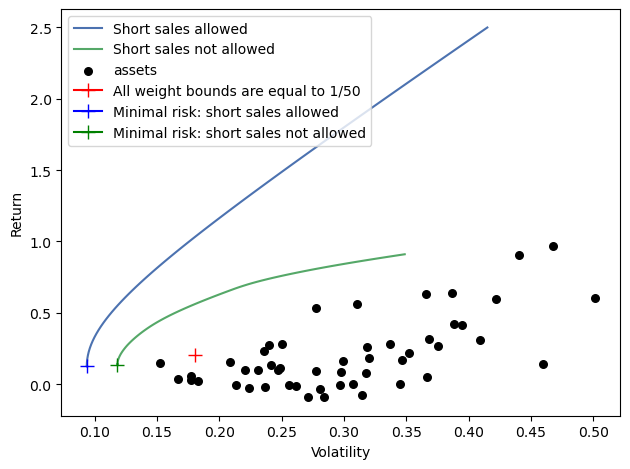

<Figure size 640x480 with 0 Axes>

In [820]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(1/50, 1/50)) #All weight bounds are equal to 1/50
minvol=ef.min_volatility()
ef.portfolio_performance(verbose=True)
performance = ef.portfolio_performance()
return3, volatility3 = performance[:2]

fig, ax = plt.subplots()

ef50_s = EfficientFrontier(mu, Sigma, weight_bounds=(-1, 1))
plotting.plot_efficient_frontier(ef50_s, ax=ax, show_assets=False, ef_param_range=np.linspace(0.00, 2.50, 100))

ef50_l = EfficientFrontier(mu, Sigma, weight_bounds=(0, 1))
plotting.plot_efficient_frontier(ef50_l, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 0.91, 100))

plt.plot([volatility3], [return3], marker='+', color='red', markerfacecolor='red', markersize=10)
plt.plot([volatility50_s], [return50_s], marker='+', color='blue', markerfacecolor='red', markersize=10)
plt.plot([volatility50_l], [return50_l], marker='+', color='green', markerfacecolor='red', markersize=10)


plt.legend(['Short sales allowed','Short sales not allowed', 'assets', 'All weight bounds are equal to 1/50', 'Minimal risk: short sales allowed', 'Minimal risk: short sales not allowed'])
plt.show()
plt.savefig('Efficient_frontiers.png')

* Когда короткие продажи разрешены, это дает возможность снизить риск, "шортя" активы, которые, по нашим ожиданиям, будут снижаться в цене. Это делает стратегию более гибкой, позволяет эффективно хеджировать риски. Фронт с короткими продажами предоставляет более широкий диапазон возможных комбинаций.


* А когда короткие продажи запрещены, нельзя хеджировать активы с высоким риском, поэтому приходится выбирать активы, которые будут наиболее стабильными, чтобы снизить общий риск. Фронт без коротких продаж ограничивает портфель, что в реальных условиях может быть более практичным для большинства инвесторов, но снижает возможности для получения более высокой доходности.

* Портфель с равными долями является "базовым" портфелем, в котором игнорируются различия в волатильности и корреляции активов, что приводит к менее эффективному распределению рисков и доходности. Он предполагает, что все активы одинаково важны для портфеля, что делает его точкой отсчета, ориентиром для сравнения с эффективными портфелями. Например, у нас есть два актива: А и Б. У актива А большой риск, а у актива Б небольшой. Чтобы снизить риск у актива А, мы сделаем его долю равной 1/50 – 1/60. А активу Б дадим долю 1/50 + 1/60. И А и Б пусть имеют одинаковую эффективность. Тогда наш «+» сдвинется влево. Равные доли могут показывать инвестору, как много он упускает в плане потенциальной доходности, если он не использует более сложные методы оптимизации.

# 3: Portfolio selection problem

**3.1 Способ отбора 10 активов**

Чтобы выбрать 10 портфелей из 50 мы использовали итеративный локальный поиск. Итеративный локальный поиск – это метод оптимизации, который использует последовательные небольшие модификации текущего решения, чтобы найти лучшее решение. На каждом шаге метода удаляется один актив и добавляется другой, при этом проверяется, улучшает ли это портфель в плане ожидаемой доходности и риска. Сперва с его помощью мы выбрали портфель из заданного набора активов, а далее выбрали 10 активов с самыми большими получившимися весами.

In [769]:
def portfolio_optimization(returns, cov_matrix, num_assets=10, max_iter=100, short_selling=True):
  """
  Итеративный локальный поиск для выбора портфеля из num_assets активов.

  Args:
    returns: Матрица доходности активов (N x T), где N - количество активов, T - количество периодов.
    cov_matrix: Ковариационная матрица доходности активов (N x N).
    num_assets: Количество активов в портфеле.
    max_iter: Максимальное количество итераций.
    short_selling: Разрешены ли короткие продажи (True/False).

  Returns:
    selected_assets: Список из num_assets выбранных активов.
    weights: Вектор весов портфеля (N).
    portfolio_return: Ожидаемая доходность портфеля.
    portfolio_risk: Стандартное отклонение доходности портфеля.
  """

  n_assets = returns.shape[0]
  best_weights = None
  best_return = -np.inf
  best_risk = np.inf

  # Проводим несколько запусков
  for _ in range(10):  # 10 запусков
    # Инициализация случайного портфеля
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    # Ограничения на веса
    if not short_selling:
      weights = np.clip(weights, 0, 1)

    # Итеративный локальный поиск
    for _ in range(max_iter):
      for i in range(n_assets):
        # Удаление текущего актива из портфеля
        temp_weights = weights.copy()
        temp_weights[i] = 0

        # Проверка остальных активов
        for j in range(n_assets):
          if j == i or temp_weights[j] > 0:
            continue

          # Добавление актива j в портфель
          temp_weights[j] = 1 - np.sum(temp_weights)

          # Ограничения на веса
          if not short_selling:
            temp_weights = np.clip(temp_weights, 0, 1)

          # Вычисление доходности и риска портфеля
          portfolio_return = np.dot(temp_weights, np.mean(returns, axis=1))
          portfolio_risk = np.sqrt(np.dot(temp_weights.T, np.dot(cov_matrix, temp_weights)))

          # Обновление весов, если найден лучший вариант
          if portfolio_return > np.dot(weights, np.mean(returns, axis=1)) and portfolio_risk < np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))):
            weights = temp_weights.copy()

    # Вычисление окончательной доходности и риска портфеля
    portfolio_return = np.dot(weights, np.mean(returns, axis=1))
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Выбор 10 активов с наибольшими весами
    selected_assets = np.argsort(weights)[-num_assets:]

    # Сохранение лучшего результата
    if portfolio_return > best_return:
      best_weights = weights
      best_return = portfolio_return
      best_risk = portfolio_risk

  return selected_assets, best_weights, best_return, best_risk




# Вычисление доходности
returns = pd.read_excel('outputHKstocksReturns.xlsx').dropna()

# Вычисление ковариационной матрицы
cov_matrix = returns.cov()

# Оптимизация портфеля с короткими продажами
selected_assets_short, weights_short, return_short, risk_short = portfolio_optimization(returns.values[:50], cov_matrix.values, num_assets=10, max_iter=100, short_selling=True)
# Оптимизация портфеля без коротких продаж
selected_assets_long, weights_long, return_long, risk_long = portfolio_optimization(returns.values[:50], cov_matrix.values, num_assets=10, max_iter=100, short_selling=False)

# Вывод результатов
print("Портфель с короткими продажами:")
print("Выбранные активы:", sorted([tickers[i] for i in selected_assets_short]))

Портфель с короткими продажами:
Выбранные активы: ['0002.HK', '0011.HK', '0017.HK', '0066.HK', '0285.HK', '0388.HK', '0762.HK', '0981.HK', '1088.HK', '3968.HK']


| ticker  | company                                               | sector                                  | effiency     | risk        |
|---------|-------------------------------------------------------|-----------------------------------------|--------------|-------------|
| 0002.HK | CLP Holdings Limited                                  | Utilities - Regulated Electric          | 0.000539652  | 0.009614254 |
| 0011.HK | Hang Seng Bank Limited                                | Banks - Regional                        | 0.00022446   | 0.011139942 |
| 0017.HK | New World Development Company Limited                 | Real Estate - Diversified               | 0.000494219  | 0.01529998  |
| 0066.HK | MTR Corporation Limited                               | Railroads                               | 0.000119876  | 0.011194883 |
| 0285.HK | BYD Electronic (International) Company Limited        | Electronic Components                   | 0.001868116  | 0.031190063 |
| 0388.HK | Hong Kong Exchanges and Clearing Limited              | Financial Data & Stock Exchanges        | -0.000100614 | 0.014077074 |
| 0762.HK | China Unicom (Hong Kong) Limited                      | Telecom Services                        | 4.42491E-06  | 0.019189821 |
| 0981.HK | Semiconductor Manufacturing International Corporation | Semiconductors                          | 0.001864126  | 0.026448854 |
| 1088.HK | China Shenhua Energy Company Limited                  | Thermal Coal                            | 0.001080179  | 0.02298693  |
| 3968.HK | China Merchants Bank Co., Ltd.                        | Banks - Regional                        | 0.000347058  | 0.017436098 |

In [771]:
print("\nПортфель без коротких продаж:")
print("Выбранные активы:", sorted([tickers[i] for i in selected_assets_long]))


Портфель без коротких продаж:
Выбранные активы: ['0066.HK', '0836.HK', '0883.HK', '0960.HK', '0981.HK', '1088.HK', '1398.HK', '1928.HK', '2382.HK', '2388.HK']


| ticker  | company                                               | sector                                  | effiency     | risk        |
|---------|-------------------------------------------------------|-----------------------------------------|--------------|-------------|
| 0066.HK | MTR Corporation Limited                               | Railroads                               | 0.000119876  | 0.011194883 |
| 0836.HK | China Resources Power Holdings Company Limited        | Utilities - Independent Power Producers | -0.000306844 | 0.019800477 |
| 0960.HK | Longfor Group Holdings Limited                        | Real Estate - Development               | -0.000382735 | 0.017896028 |
| 0981.HK | Semiconductor Manufacturing International Corporation | Semiconductors                          | 0.001864126  | 0.026448854 |
| 1088.HK | China Shenhua Energy Company Limited                  | Thermal Coal                            | 0.001080179  | 0.02298693  |
| 1398.HK | Industrial and Commercial Bank of China Limited       | Banks - Diversified                     | 0.000377147  | 0.014536454 |
| 1928.HK | Sands China Ltd.                                      | Resorts & Casinos                       | 0.001391247  | 0.024275615 |
| 2382.HK | Sunny Optical Technology (Group) Company Limited      | Electronic Components                   | 0.00268927   | 0.029040562 |
| 2388.HK | BOC Hong Kong (Holdings) Limited                      | Banks - Regional                        | 0.000950884  | 0.015085152 |

**3.2 Сравнение фронтов при разрешенных коротких продажах**

Expected annual return: 5.1%
Annual volatility: 12.8%
Sharpe Ratio: 0.24


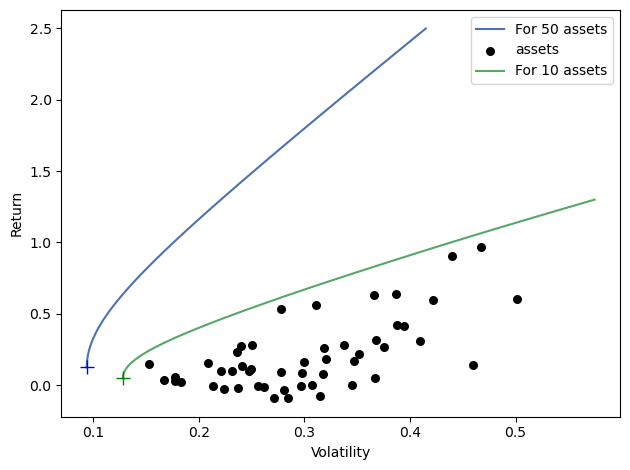

In [774]:
df_stocks= pd.read_excel('outputHKstocks.xlsx', usecols=sorted([tickers[i] for i in selected_assets_short])).dropna()
#Годовая доходность
mu10_s = expected_returns.mean_historical_return(df_stocks)
#Дисперсия портфеля
Sigma10_s = risk_models.sample_cov(df_stocks)
ef10_s = EfficientFrontier(mu10_s, Sigma10_s, weight_bounds=(-1,1))
minvol=ef10_s.min_volatility()
minvol_pwt=ef10_s.clean_weights()
performance = ef10_s.portfolio_performance(verbose=True)
return10_s, volatility10_s = performance[:2]

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef50_s, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100))
ef10_s = EfficientFrontier(mu10_s, Sigma10_s, weight_bounds=(-1,1))
plotting.plot_efficient_frontier(ef10_s, ax=ax, show_assets=False, ef_param_range=np.linspace(0.00, 1.3, 100))
plt.plot([volatility50_s], [return50_s], marker='+', color='blue', markerfacecolor='red', markersize=10)
plt.plot([volatility10_s], [return10_s], marker='+', color='green', markerfacecolor='red', markersize=10)
plt.legend(['For 50 assets','assets', 'For 10 assets'])
#plt.savefig('Efficient_frontiers_t3_s.png')
plt.show()

При включении в портфель всех 50 активов у вас есть больше возможностей для оптимизации риска и доходности, что приводит к более высокой доходности при том же уровне риска. Доходность портфеля с минимальным риском из 10 акций сильно мала возможно из-за того, что акции могут быть недостаточно диверсифицированными.

**Сравнение фронтов при запрещённых коротких продажах**

Expected annual return: 6.6%
Annual volatility: 15.8%
Sharpe Ratio: 0.29


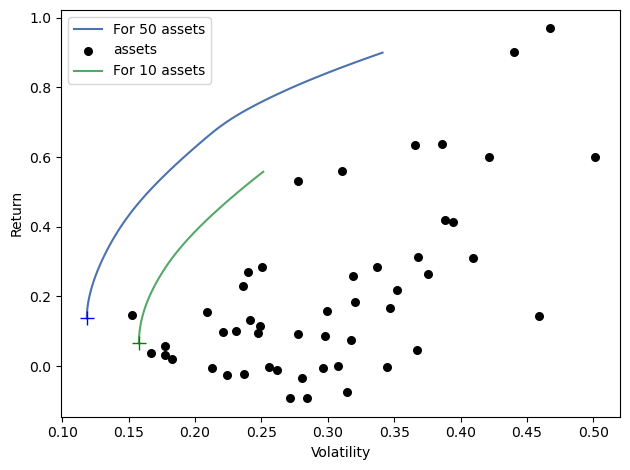

In [778]:
df_stocks= pd.read_excel('outputHKstocks.xlsx', usecols=sorted([tickers[i] for i in selected_assets_long])).dropna()
#Годовая доходность
mu10_l = expected_returns.mean_historical_return(df_stocks)
#Дисперсия портфеля
Sigma10_l = risk_models.sample_cov(df_stocks)
ef10_l = EfficientFrontier(mu10_l, Sigma10_l, weight_bounds=(0,1))
minvol=ef10_l.min_volatility()
minvol_pwt=ef10_l.clean_weights()
ef10_l.portfolio_performance(verbose=True)
performance = ef10_l.portfolio_performance()
return10_l, volatility10_l = performance[:2]

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef50_l, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 0.90, 100))
ef10_l = EfficientFrontier(mu10_l, Sigma10_l, weight_bounds=(0,1))
plotting.plot_efficient_frontier(ef10_l, ax=ax, show_assets=False, ef_param_range=np.linspace(0.00, 0.558, 100))
plt.plot([volatility50_l], [return50_l], marker='+', color='blue', markerfacecolor='red', markersize=10)
plt.plot([volatility10_l], [return10_l], marker='+', color='green', markerfacecolor='red', markersize=10)
plt.legend(['For 50 assets','assets', 'For 10 assets'])
#plt.savefig('Efficient_frontiers_t3_l.png')
plt.show()

Здесь снова эффективный фронт для 50 активов поднимается выше, чем фронт для 10 активов, что указывает на более широкие возможности оптимизации для портфеля с большим количеством активов.Примечательно, что риск и доходность портфеля из 10 активов практически равны (20.2% риска и 23.5% доходности). Это говорит о том, что сокращение количества активов всё же позволило достичь приличного уровня эффективности, хотя и не такого высокого, как в случае с 50 активами.

# 4: RISK AVERSION

Мы решили взять risk aversion = 0.5. Тем самым выбирая портфели, которые ориентируются на более доходные активы, практически не учитывая риски.

**4.1 Оптимальные портфели для обоих случаев с risk_aversion = 0.5 с разрешенными короткими продажами**

In [784]:
df_stocks = pd.read_excel('outputHKstocks.xlsx')
mu = expected_returns.mean_historical_return(df_stocks)
tickers, weight_1, weight_2 = [], [], []
#Дисперсия портфеля
Sigma = risk_models.sample_cov(df_stocks)
#Sigma = risk_models.CovarianceShrinkage(df_stocks).ledoit_wolf()
#Максимальный коэффициент Шарпа
coeff = 0.5
portfolio_ra = [[], []]
portfolio_ra_2 = [[], []]
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1))
risk_avers=ef.max_quadratic_utility(risk_aversion=coeff, market_neutral=False)
risk_avers_pwt=ef.clean_weights()
pp = ef.portfolio_performance(verbose=True)
portfolio_ra[0].append(pp[1])
portfolio_ra[1].append(pp[0])

Expected annual return: 905.8%
Annual volatility: 199.4%
Sharpe Ratio: 4.53


Такие большая доходность и волатильность неудивительны, так как мы взяли достаточно маленькое отношение к риску, тем не менее волатильность меньше в **4.5** раза меньше доходности. Скорее всего, с помощью коротких продаж снижается риск общего портфеля.

**4.2 Оптимальные портфели для обоих случаев с risk_aversion = 0.5 с запрещёнными короткими продажами**

In [787]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1))
risk_avers_2=ef.max_quadratic_utility(risk_aversion=coeff, market_neutral=False)
risk_avers_2_pwt=ef.clean_weights()
pp = ef.portfolio_performance(verbose=True)
portfolio_ra_2[0].append(pp[1])
portfolio_ra_2[1].append(pp[0])

Expected annual return: 96.6%
Annual volatility: 45.0%
Sharpe Ratio: 2.10


Здесь же волатильность меньше уже в **2** раза.

Взглянем на доли в портфелях:

| 0002.HK | 0003.HK | 0005.HK  | 0006.HK | 0011.HK | 0012.HK | 0016.HK  | 0017.HK | 0027.HK | 0066.HK | 0101.HK | 0175.HK | 0285.HK | 0288.HK | 0291.HK | 0386.HK | 0388.HK | 0669.HK | 0700.HK | 0762.HK | 0823.HK | 0836.HK | 0857.HK  | 0868.HK | 0881.HK | 0883.HK | 0939.HK | 0941.HK | 0960.HK | 0981.HK | 1088.HK | 1093.HK  | 1099.HK | 1113.HK | 1211.HK | 1299.HK | 1378.HK | 1398.HK | 1928.HK | 1929.HK | 2020.HK | 2313.HK | 2318.HK | 2319.HK | 2331.HK | 2382.HK | 2388.HK | 2899.HK | 3968.HK | 3988.HK |
|---------|---------|----------|---------|---------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 1       | -1      | -0.27775 | -1      | -1      | -1      | -0.74013 | 1       | 1       | -1      | -1      | 1       | 1       | 1       | -1      | 1       | -1      | -1      | 1       | -1      | 1       | -1      | -0.05385 | 1       | 1       | 1       | 1       | -1      | -1      | 1       | 1       | -0.48831 | -1      | -1      | -1      | -1      | 1       | -1      | 1       | 1       | 0.01145 | 1       | -1      | 1       | 0.54858 | 1       | 1       | 1       | -1      | -1      |


| 0002.HK | 0003.HK | 0005.HK | 0006.HK | 0011.HK | 0012.HK | 0016.HK | 0017.HK | 0027.HK | 0066.HK | 0101.HK | 0175.HK | 0285.HK | 0288.HK | 0291.HK | 0386.HK | 0388.HK | 0669.HK | 0700.HK | 0762.HK | 0823.HK | 0836.HK | 0857.HK | 0868.HK | 0881.HK | 0883.HK | 0939.HK | 0941.HK | 0960.HK | 0981.HK | 1088.HK | 1093.HK | 1099.HK | 1113.HK | 1211.HK | 1299.HK | 1378.HK | 1398.HK | 1928.HK | 1929.HK | 2020.HK | 2313.HK | 2318.HK | 2319.HK | 2331.HK | 2382.HK | 2388.HK | 2899.HK | 3968.HK | 3988.HK |
|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0.05661 | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0.94339 | 0       | 0       | 0       | 0       |


В первом портфеле практически все доли равны 1 и -1. Это обусловлено тем, что мы приблизились к границе возможных вложений в активы.

Занятно, что в отличие от первого портфеля, в портфеле с запретом коротких используется всего две акции, и то, основной упор идет только на одну


| ticker  | company                                               | sector                                  | weight       |
|---------|-------------------------------------------------------|-----------------------------------------|--------------|
| 2382.HK | Sunny Optical Technology (Group) Company Limited      | Electronic Components                   | 0.94339      |
| 0175.HK | Geely Automobile Holdings Limited                     | Auto Manufacturers                      | 0.05661      |


(Скорее всего, это обусловлено тем, что у компании наибольшая эффективность из всех)

**Посмотрим на графике**

D:\anaconda\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


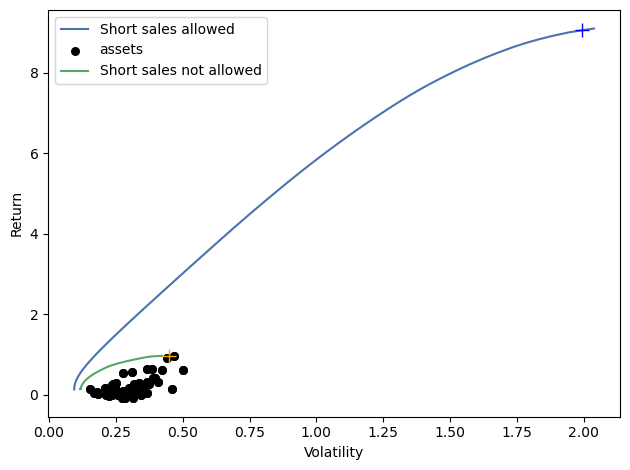

In [792]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1, 1))
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 9.1, 100))
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0, 1))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 0.96, 100))
plt.plot(portfolio_ra[0], portfolio_ra[1], marker='+', color='blue', markerfacecolor='red', markersize=10)
plt.plot(portfolio_ra_2[0], portfolio_ra_2[1], marker='+', color='orange', markerfacecolor='red', markersize=10)
plt.legend(['Short sales allowed', 'assets', 'Short sales not allowed'])
plt.show()

**4.3 Оценка VaR и CVaR для разрешенных коротких продаж**

In [795]:
weights = np.array(list(risk_avers_pwt.values()))

returns = pd.read_excel('outputHKstocksReturns.xlsx')

In [797]:
def value_at_risk(
    value_invested, 
    returns, weights, 
    alpha=0.95, 
    lookback_days=500
):
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [799]:
def cvar(
    value_invested, 
    returns, 
    weights, 
    alpha=0.95, 
    lookback_days=500
):
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    var_pct_loss = var / value_invested
    
    return np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss]) * value_invested

CVaR и VaR с разрешением коротких продаж

In [802]:
cvar(1, returns, weights)

-0.22565207015098

In [804]:
value_at_risk(1, returns, weights)

-0.1791374778177766

Text(0, 0.5, 'Observation Frequency')

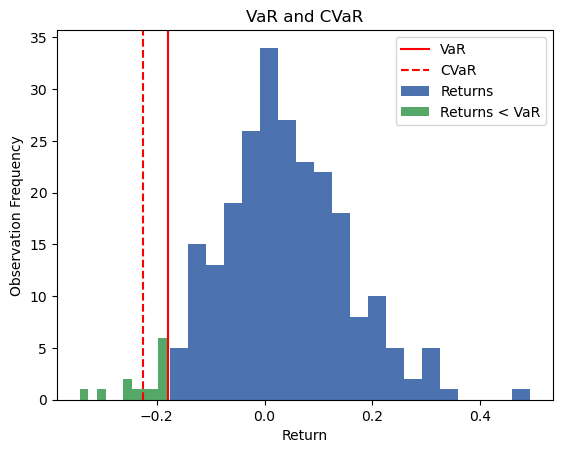

In [806]:
lookback_days = 500

portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(1000, returns, weights)
portfolio_VaR_return = portfolio_VaR / 1000

portfolio_CVaR = cvar(1000, returns, weights)
portfolio_CVaR_return = portfolio_CVaR / 1000

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.title('VaR and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

**VaR: -0.1791** (17.91% возможная потеря при худшем сценарии за заданный период).

**CVaR: -0.2257** (22.57% средняя потеря при наступлении худших 5% сценариев).


Это означает, что при разрешении коротких продаж портфель имеет более высокие потенциальные потери. Хотя рискованный профиль может приносить больше доходности, портфель подвержен более значительным убыткам, что видно из высоких значений CVaR.

**4.4 Оценка VaR и CVaR для запрещённых коротких продаж**

In [809]:
weights = np.array(list(risk_avers_2_pwt.values()))

returns = pd.read_excel('outputHKstocksReturns.xlsx')

In [811]:
cvar(1, returns, weights)

-0.047992814368789896

In [813]:
value_at_risk(1, returns, weights)

-0.03916438886485777

Text(0, 0.5, 'Observation Frequency')

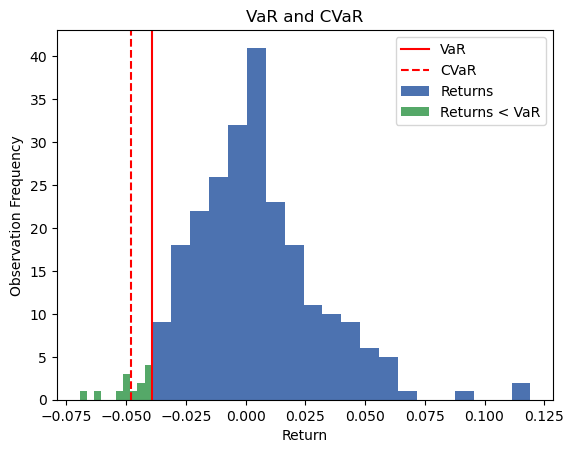

In [815]:
lookback_days = 500

portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(1000, returns, weights)
portfolio_VaR_return = portfolio_VaR / 1000

portfolio_CVaR = cvar(1000, returns, weights)
portfolio_CVaR_return = portfolio_CVaR / 1000

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.title('VaR and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

**VaR: -0.0392** (3.92% возможная потеря при худшем сценарии за заданный период).

**CVaR: -0.0480** (4.8% средняя потеря при наступлении худших 5% сценариев).

При запрете коротких продаж портфель показывает значительно меньшие потенциальные потери, что делает его более безопасным.